In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv('./transport.csv',encoding='utf-8')

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

print(df.info())
print(df.describe())
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     609 non-null    object
 1   호선명     609 non-null    object
 2   역ID     609 non-null    int64 
 3   지하철역    609 non-null    object
 4   유임승차    609 non-null    object
 5   유임하차    609 non-null    object
 6   무임승차    609 non-null    object
 7   무임하차    609 non-null    object
 8   작업일시    609 non-null    object
dtypes: int64(1), object(8)
memory usage: 42.9+ KB
None
              역ID
count  609.000000
mean   316.558292
std    191.707083
min      1.000000
25%    153.000000
50%    310.000000
75%    462.000000
max    725.000000
          사용월  호선명  역ID 지하철역       유임승차     유임하차     무임승차     무임하차  \
0  2021-12-01  1호선    1  서울역  1,023,496  992,919  158,933  149,469   
1  2021-12-01  1호선   10  동묘앞    112,756  119,021  122,515  123,248   
2  2021-12-01  1호선    2   시청    504,322  504,450   65,715   65,083   

 

In [2]:
# preprocessing

# remove comma and type int
df = df.applymap(lambda x:x.replace(',','') if (isinstance(x,str) and x.find(',') != -1) else x)

df['유임승차'] = pd.to_numeric(df['유임승차'])
df['유임하차'] = pd.to_numeric(df['유임하차'])
df['무임승차'] = pd.to_numeric(df['무임승차'])
df['무임하차'] = pd.to_numeric(df['무임하차'])


# type datetime
df['사용월'] = pd.to_datetime(df['사용월'])
df['작업일시'] = pd.to_datetime(df['작업일시'])

print(df.info())
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용월     609 non-null    datetime64[ns]
 1   호선명     609 non-null    object        
 2   역ID     609 non-null    int64         
 3   지하철역    609 non-null    object        
 4   유임승차    609 non-null    int64         
 5   유임하차    609 non-null    int64         
 6   무임승차    609 non-null    int64         
 7   무임하차    609 non-null    int64         
 8   작업일시    609 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 42.9+ KB
None
         사용월  호선명  역ID 지하철역     유임승차    유임하차    무임승차    무임하차  \
0 2021-12-01  1호선    1  서울역  1023496  992919  158933  149469   
1 2021-12-01  1호선   10  동묘앞   112756  119021  122515  123248   
2 2021-12-01  1호선    2   시청   504322  504450   65715   65083   

                 작업일시  
0 2022-01-03 10:00:00  
1 2022-01-03 10:00:00  
2 2022-0

In [3]:
# 유임승차비율이 가장 높은 곳을 찾아라

rate_paid = df['유임승차']/(df['유임승차']+df['무임승차'])
df['유임승차비율'] = rate_paid

df[df['유임승차비율'] == df['유임승차비율'].max()]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
237,2021-12-01,분당선,150,복정,16,0,0,0,2022-01-03 10:00:00,1.0
266,2021-12-01,일산선,376,지축,11,0,0,0,2022-01-03 10:00:00,1.0
330,2021-12-01,경의선,203,계양,8,0,0,0,2022-01-03 10:00:00,1.0
331,2021-12-01,경의선,204,검암,2,0,0,0,2022-01-03 10:00:00,1.0
440,2021-12-01,6호선,446,연신내,26,0,0,0,2022-01-03 10:00:00,1.0


In [4]:
# 유임승차, 무임승차, 유임하차, 무임하차 인원이 가장 많은 곳을 찾아라

max_values = df.describe().max()[1:5]

axes = max_values.axes[0].tolist()
values = list(map(int,max_values.values.tolist()))

for axe,val in zip(axes,values):
    print(df[df[axe] == val])



          사용월  호선명  역ID 지하철역     유임승차     유임하차    무임승차    무임하차  \
31 2021-12-01  2호선   32   강남  2039844  2034226  153264  137102   

                  작업일시    유임승차비율  
31 2022-01-03 10:00:00  0.930116  
          사용월  호선명  역ID 지하철역     유임승차     유임하차    무임승차    무임하차  \
31 2021-12-01  2호선   32   강남  2039844  2034226  153264  137102   

                  작업일시    유임승차비율  
31 2022-01-03 10:00:00  0.930116  
         사용월  호선명  역ID  지하철역    유임승차    유임하차    무임승차    무임하차  \
4 2021-12-01  1호선    4  종로3가  407934  375067  249355  234742   

                 작업일시    유임승차비율  
4 2022-01-03 10:00:00  0.620631  
         사용월  호선명  역ID 지하철역    유임승차    유임하차    무임승차    무임하차  \
8 2021-12-01  1호선    8  제기동  217819  208609  226280  241771   

                 작업일시    유임승차비율  
8 2022-01-03 10:00:00  0.490474  


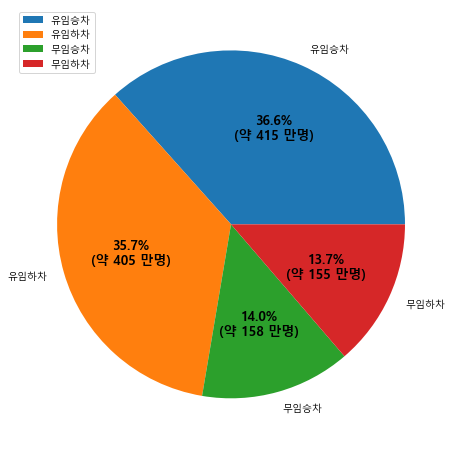

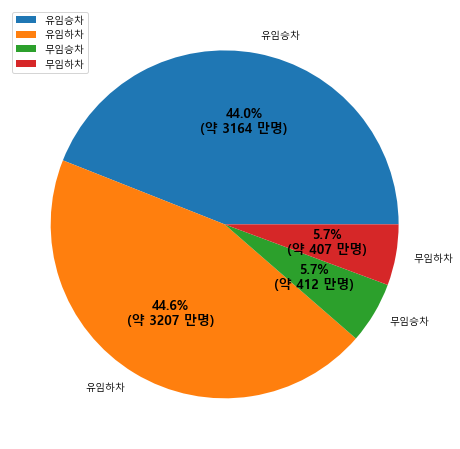

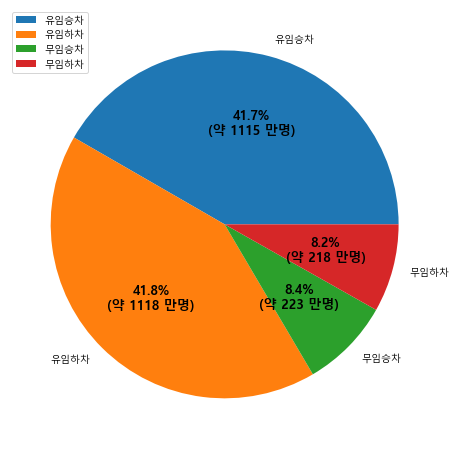

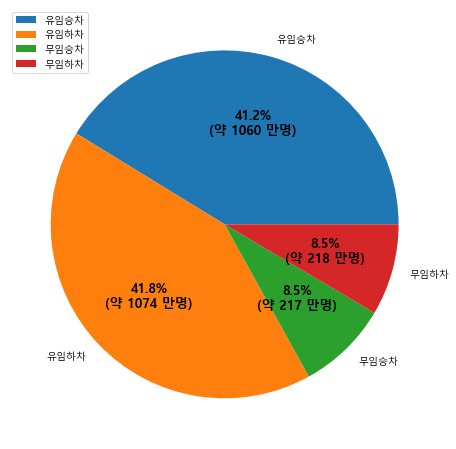

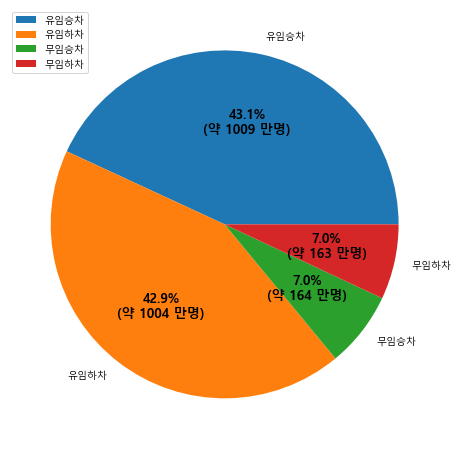

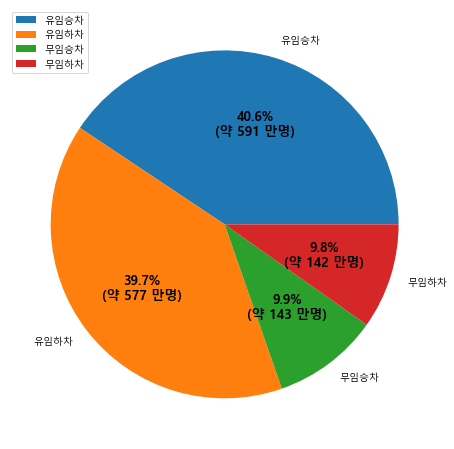

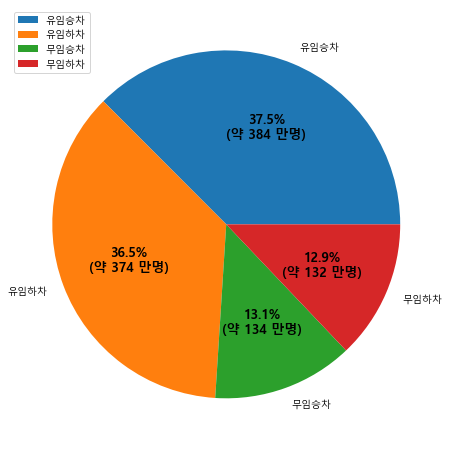

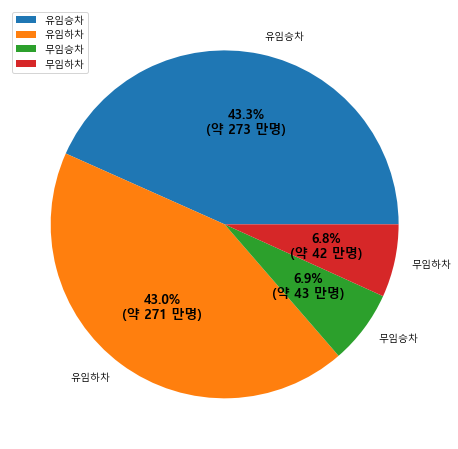

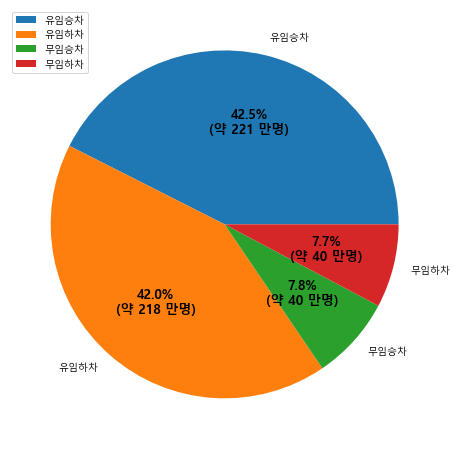

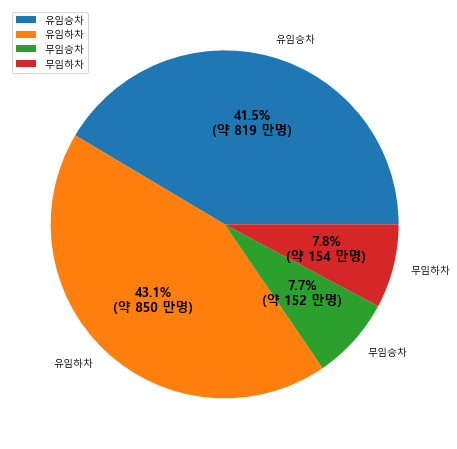

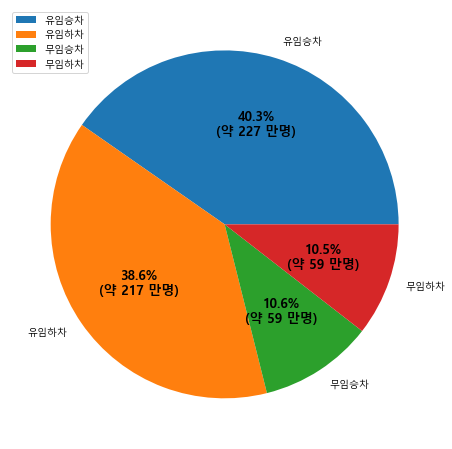

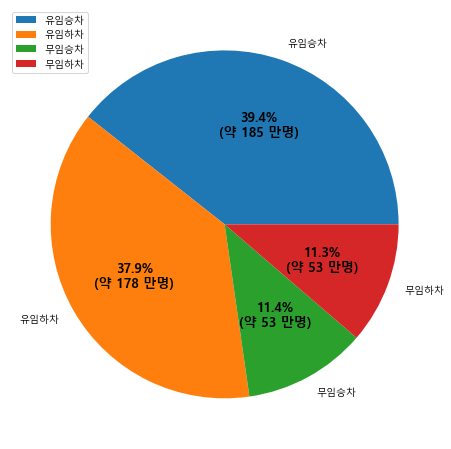

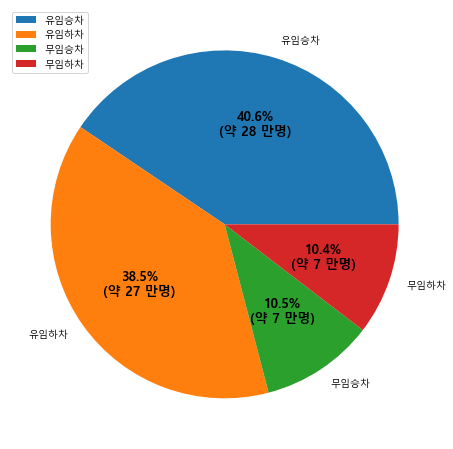

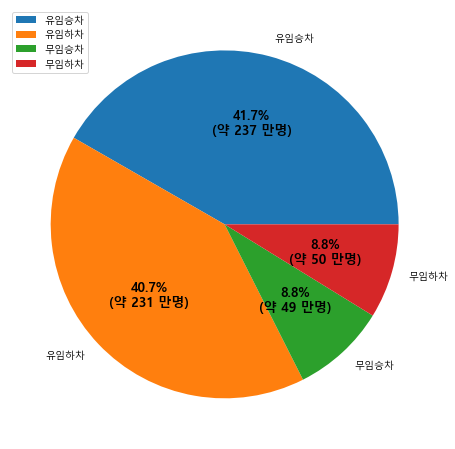

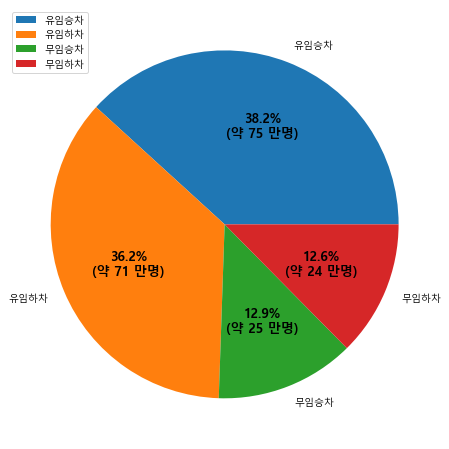

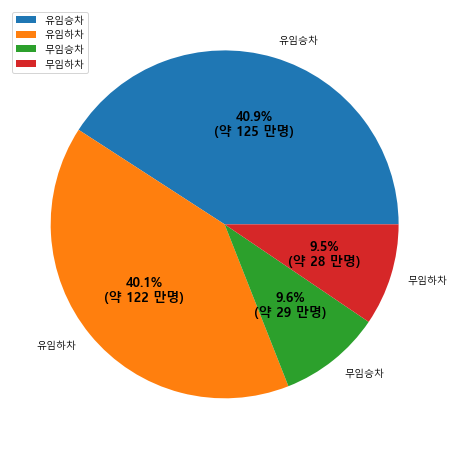

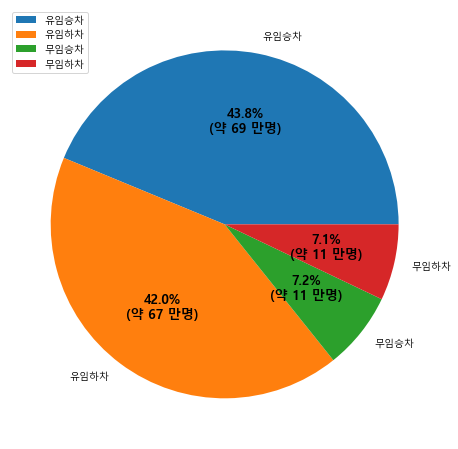

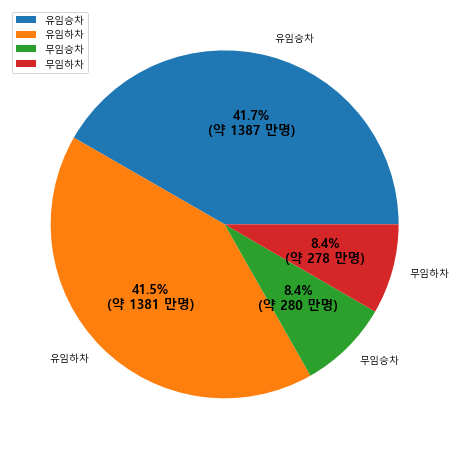

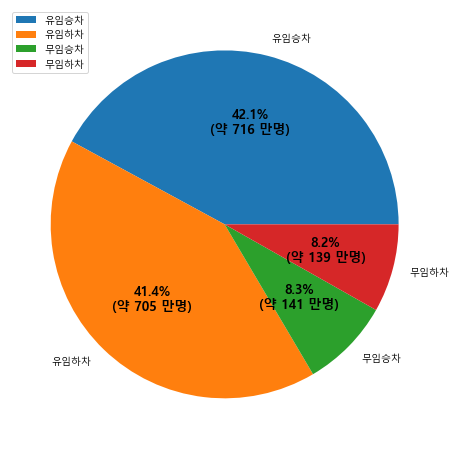

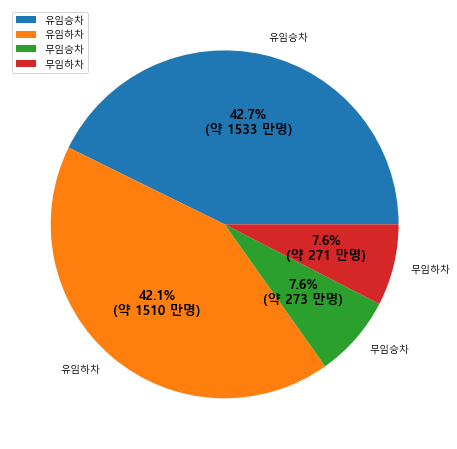

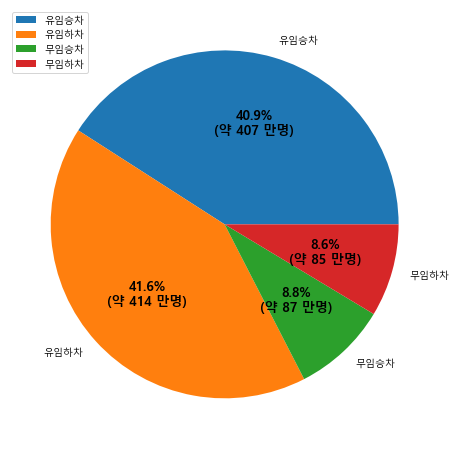

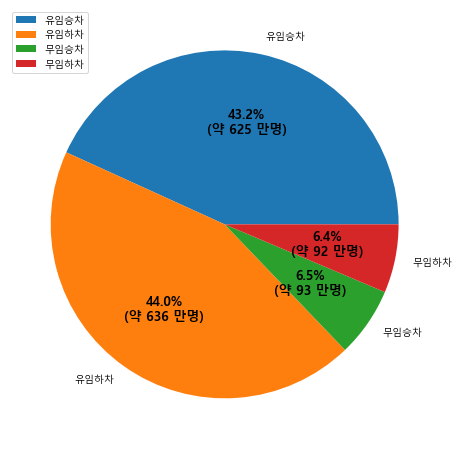

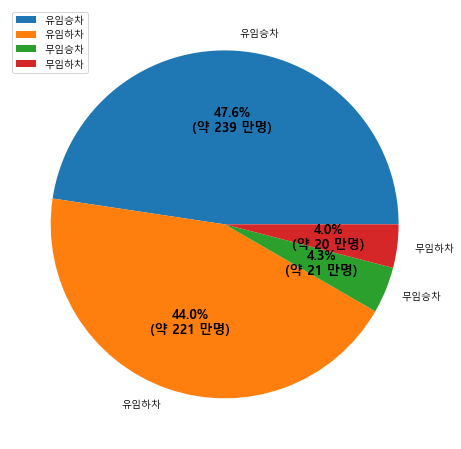

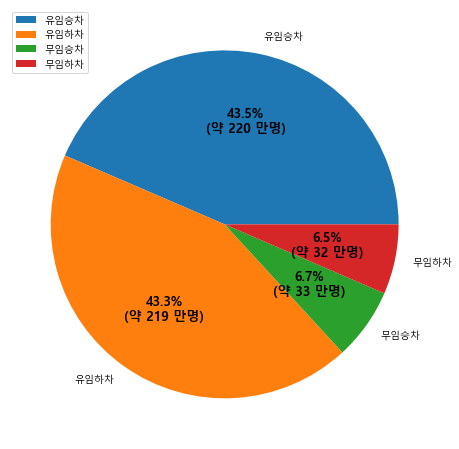

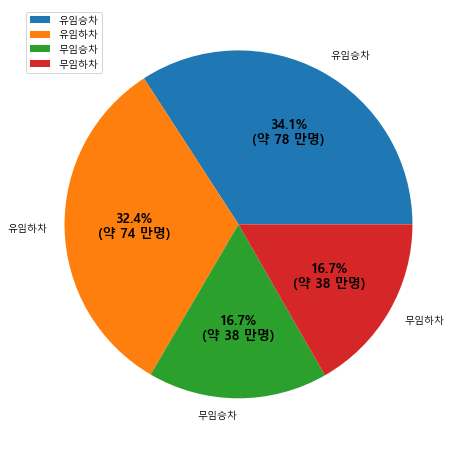

In [5]:
# pie chart of all stations

def show_vals(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n(약 {:d} 만명)".format(pct, absolute//10000)

def make_pie_chart(station, df:pd.DataFrame):
    df_fir_station = df[df['호선명'] == station]

    axes = df_fir_station.columns.tolist()[4:8]
    values = df_fir_station.loc[:,axes].sum(axis=0).tolist()

    plt.figure(figsize=(15,8))

    wedges, texts, autotexts = plt.pie(values,labels=axes,autopct=lambda pct:show_vals(pct,values))
    plt.setp(autotexts,size=13,weight='bold')
    plt.legend(loc=2)

    path = os.path.join(os.getcwd(),'pie',station)
    plt.savefig(path)
    plt.show()
    plt.close()

for i in df['호선명'].unique():
    make_pie_chart(i,df)